# 

# Picking the Best Predictive Model:  A Case Study in Analytics Operationalization 

## Part 4. Assessment of Predictive Model Performance

### Author: Craig Adams
#### Contact: craig.adams@elementaryinsights.com
#### Date: July 5, 2022

### Table of Contents

[Introduction](#Introduction) <br>
[Methodology](#Methodology) <br>
[Results and Discussion](#Results-and-Discussion) <br>
[Summary and Conclusions](#Project-Summary-and-Conclusions) <br>

###  Introduction

[go to top](#Table-of-Contents) <br>

>"*All models are wrong, some are useful, and some are more cost effective than others - Unknown*"

The goal of this study was to explore the development of different analytical solutions for a particular business problem, ranging from the simplest techniques to more complex ML models.  Through the exploration, the aim was to: 

1. Evaluate model performances from a technical perspective such as goodness of fit and prediction accuracy
2. Evaluate the relative performance of the models from a business perspective in terms of:
    - impact on business KPIs 
    - relative cost of model development 
    - relative cost of model operationalization 

Through the work in Parts 1, 2 and 3, four different models have been developed that might help our fictious client, Jetsonair, come up with a better way to predict the failures of their fleet of drone jet engines so they can be removed from service before the failure, but at the same time, not give up too much of the remaining useful life.

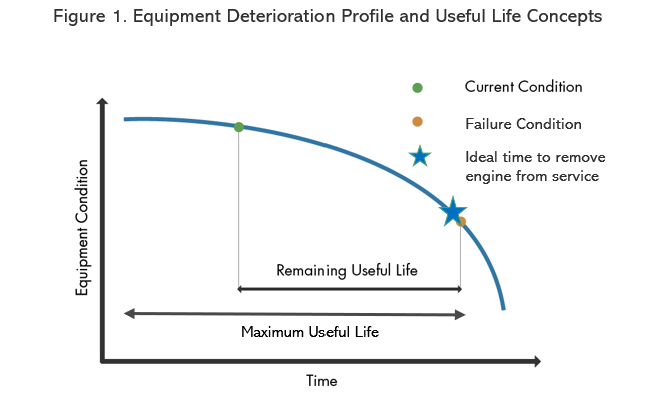


The final part of the work is to consolidate the results for the test data set and the modeling work at large for review with the client to decide on the next steps. 


### Methodology

[go to top](#Table-of-Contents) <br>

In [1]:
### Python Configuration-  Note that Plotly is required for this notebook

# Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# import plotly.graph_objects as go

# Set environment variables
sns.set_style('dark')
plt.rcParams['figure.figsize'] = (8, 6)



#### Test Data Ingestion and Inspection

The summary of results from Parts 2 and 3 were saved in .csv format at the end of Part 3.  The data can be reloaded into a dataframe for inspection.

In [2]:
# Import the data from the project directory
results_df = pd.read_csv('./data/failure_test_with_models_threshold10.csv')

# Quick check of the cleaned dataset to make sure it loaded correctly
display(results_df.sample(10))
print(f"The dataframe shape is {results_df.shape[0]} rows and {results_df.shape[1]} columns\n")
display(results_df.info())

,unit_number,cycle_time,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,RUL,Failure_Threshold,sensor_11_alert,dtree_proba,logit_proba
1959,89,89,641.90,1583.66,1402.83,553.66,2388.08,47.19,521.89,2388.03,8.4067,391,39.11,23.3826,128,0,0,0.0032,0.0000
3711,96,298,643.34,1602.08,1428.24,552.46,2388.17,47.87,520.98,2388.15,8.4852,396,38.57,23.1607,38,0,0,0.1758,0.1185
1922,89,52,642.24,1581.21,1394.40,553.77,2388.03,47.02,522.02,2388.05,8.4017,392,38.96,23.4281,165,0,0,0.0032,0.0000
2391,92,15,642.53,1583.04,1406.82,554.67,2388.13,47.41,522.20,2388.03,8.4059,393,38.95,23.4128,326,0,0,0.0032,0.0000
607,83,154,642.51,1588.42,1397.16,553.69,2388.03,47.23,522.19,2387.96,8.4033,390,39.09,23.3369,139,0,0,0.0032,0.0000
3872,97,123,642.31,1589.61,1404.06,552.88,2388.10,47.42,522.10,2388.06,8.4322,394,38.89,23.3834,79,0,0,0.0032,0.0000
2202,90,115,642.85,1582.97,1413.08,553.76,2388.13,47.56,521.45,2388.13,8.4443,393,38.78,23.3268,39,0,0,0.0032,0.0000
4226,99,119,642.81,1587.63,1409.06,553.18,2388.11,47.48,521.54,2388.11,8.4483,392,38.66,23.2476,66,0,0,0.0032,0.0000
3535,96,122,642.43,1586.33,1406.45,553.56,2388.09,47.53,521.66,2388.08,8.4650,394,38.94,23.3937,214,0,0,0.0032,0.0000
2519,92,143,642.28,1586.38,1398.52,553.46,2388.08,47.33,521.71,2388.02,8.4007,392,38.81,23.3807,198,0,0,0.0032,0.0000


The dataframe shape is 4493 rows and 19 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unit_number        4493 non-null   int64  
 1   cycle_time         4493 non-null   int64  
 2   sensor_2           4493 non-null   float64
 3   sensor_3           4493 non-null   float64
 4   sensor_4           4493 non-null   float64
 5   sensor_7           4493 non-null   float64
 6   sensor_8           4493 non-null   float64
 7   sensor_11          4493 non-null   float64
 8   sensor_12          4493 non-null   float64
 9   sensor_13          4493 non-null   float64
 10  sensor_15          4493 non-null   float64
 11  sensor_17          4493 non-null   int64  
 12  sensor_20          4493 non-null   float64
 13  sensor_21          4493 non-null   float64
 14  RUL                4493 non-null   int64  
 15  Failure_Threshold  4493

None

The test set data is intact, with float datatypes for the two classifiers and their soft failure predictions, and integer values for the Failure Threshold and Sensor Alert.  There are no null values. 

The specifics of the test data set have not being explored yet.  Briefly, the distribution of the RUL values associated with the test engines is shown below.   

In [3]:
def plot_RUL_histogram(col):
    """ This function plots the histogram of a dataframe's RUL column and adds statistical details
    """
    sns.set_style('darkgrid')

    plt.figure(figsize=(10,6))
    plt.hist(col, bins = 30)
    plt.title('Remaining Useful Life Frequency', size=15)
    plt.xlabel('Remaining Useful Life', size=12)
    plt.ylabel('Frequency', size=12)
    plt.axvline(col.mean(), label = 'mean', color = 'red')
    plt.axvline(col.median(), label = 'median', color = 'blue')
    plt.axvline(col.mode()[0], label = 'mode', color = 'black')
    plt.legend()
    plt.show()

    return

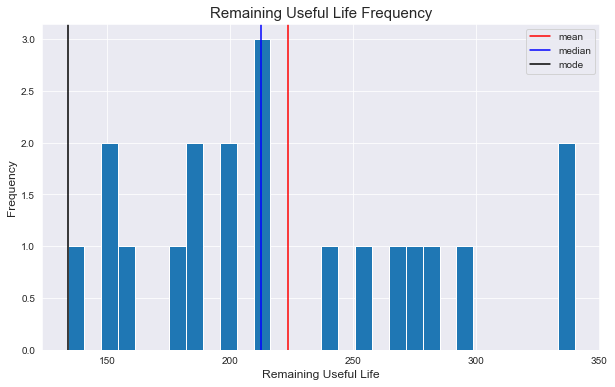

count     20.000000
mean     223.650000
std       60.311712
min      134.000000
25%      182.250000
50%      212.500000
75%      268.750000
max      340.000000
Name: RUL, dtype: float64

In [4]:
# Extract the max RULs for the engines at the cut off
results_RUL_max = results_df.groupby('unit_number')['RUL'].max().reset_index()
# print(results_RUL_max)

# Plot results
plot_RUL_histogram(results_RUL_max['RUL'])
display(results_RUL_max['RUL'].describe().T)

The distribution of the RUL values for the test set have a higher mean and median values of 224 and 212 versus the mean and median values of 205 and 198 in the full dataset. The span of values is 134 to 340 cycles, which is similar to the span of 127 to 361 for all data.

The test set seems to be a reasonably unbiased data set for final model performance scoring.

#### Test Data Processing

The goal is to re-calculate and compare performance for the 20 test units rather than the full 100 units as per Part 2.  By default, the hard threshold for the DT3 and Logit model will be set to 0.5 for consistency with previous discussions of model performance.  The Weibull threshold alert of 131 cycles can also be added to the data.

In [5]:
# Set A Hard limit for Classifiers, default = 0.5

hard_limit = 0.5

# Update alert thresholds from hard to soft_limits results_df['sensor_11_stop'] = np."where
results_df['dtree_alert'] = np.where(results_df['dtree_proba'] >= hard_limit, 1,0)
results_df['logit_alert'] = np.where(results_df['logit_proba'] >= hard_limit, 1,0)

# Add static Weibull threshold at 131 cycles
results_df['weibull_alert'] = np.where(results_df['cycle_time'] >= 131, 1,0)

# Check
alert_subset = ['sensor_11_alert','dtree_proba','logit_proba', 'dtree_alert', 'logit_alert','weibull_alert']
display(results_df[alert_subset].tail(30).T)

,4463,4464,4465,4466,4467,4468,4469,4470,4471,4472,...,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492
sensor_11_alert,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.000,0.0000,1.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
dtree_proba,0.0032,0.7081,0.0032,0.7081,0.0032,0.0032,0.160,0.2561,0.1758,0.0032,...,0.7081,0.5516,0.9175,0.7081,0.9175,0.7081,0.7081,0.7081,0.9175,0.9175
logit_proba,0.0182,0.0582,0.0293,0.0321,0.0186,0.0737,0.111,0.0329,0.1929,0.0306,...,0.9808,0.6292,0.9072,0.6737,0.9467,0.9154,0.9430,0.9950,0.9850,0.9820
dtree_alert,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
logit_alert,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
weibull_alert,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Note that the sensor and ML alert values are bouncing between 1 and 0 (e.g columns 4463-4468 for the sensor_11_alert and dtree_alert sequences above).  Previously, the first instance was extracted for the business KPI calculations, but a forward-fill technique is appropriate here to find the first instance and overwrite the other values as RUL approaches zero.

In [6]:
def forward_fill_flags(results_df, column):
    
# Loop over each engine and update the flags
    for engine in engines:
        # Find the first instance index value
        condition = (results_df['unit_number'] ==engine)&(results_df[column] ==1)
        idx = (condition).idxmax()
        # Forward fill the fields to set all values to 1
        results_df.loc[((results_df['unit_number'] ==engine)&(results_df.index >= idx)), column] = 1
        
    return results_df

In [7]:
# Get engine numbers and total engine count
engines = results_df['unit_number'].unique()
# print(engines)
engine_count = len(engines)

# Forward fill alerts
results_df = forward_fill_flags(results_df, 'sensor_11_alert')
results_df = forward_fill_flags(results_df, 'dtree_alert')
results_df = forward_fill_flags(results_df, 'logit_alert')
display(results_df[alert_subset].tail(30).T)

,4463,4464,4465,4466,4467,4468,4469,4470,4471,4472,...,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492
sensor_11_alert,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
dtree_proba,0.0032,0.7081,0.0032,0.7081,0.0032,0.0032,0.160,0.2561,0.1758,0.0032,...,0.7081,0.5516,0.9175,0.7081,0.9175,0.7081,0.7081,0.7081,0.9175,0.9175
logit_proba,0.0182,0.0582,0.0293,0.0321,0.0186,0.0737,0.111,0.0329,0.1929,0.0306,...,0.9808,0.6292,0.9072,0.6737,0.9467,0.9154,0.9430,0.9950,0.9850,0.9820
dtree_alert,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
logit_alert,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
weibull_alert,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Results and Discussion

[go to top](#Table-of-Contents) <br>

#### Final Scoring - Fleet Perspective

The summary statistics for the test engine fleet can now be readily calculated and summarized in the table below.

In [8]:
### Calculate KPIs for the fleet

fleet_results_summary = []
total_max_cycles = results_df['RUL'].shape[0]-engine_count

alert_columns = ['weibull_alert','sensor_11_alert','dtree_alert','logit_alert']

for alert in alert_columns:

    # Operating cycles remaining
    total_alert_cycles = results_df[alert].sum()-engine_count
    # Operating efficiencies
    alert_op_eff = 100-round(total_alert_cycles/total_max_cycles*100,0)
    # Count of Failed Engines
    alert_failed_engines = results_df[(results_df['RUL'] ==0) & (results_df[alert]==0)].sort_values(by='unit_number')
    alert_failed_engine_count = alert_failed_engines.shape[0]
    # Count of Engines close to failure
    alert_close_engines = results_df[(results_df['RUL'] <=3) & (results_df[alert]==0)].sort_values(by='unit_number')
    alert_close_engine_count = alert_close_engines.shape[0]
    
    # Collect and append results
    results = [total_alert_cycles, alert_failed_engine_count, alert_close_engine_count, alert_op_eff]
    fleet_results_summary.append(results)
    
# display(fleet_results_summary)

In [9]:
# Results summary to dataframe
columns =['Cycles lost','Failed Engines', 'Engines Close to Failure','Operating Efficiency']
fleet_results_summary_df = pd.DataFrame(fleet_results_summary, columns = columns)
fleet_results_summary_df.index = ['Weibull Alert','Sensor Alert','DT3 Alert','Logit Alert']
display(fleet_results_summary_df)

,Cycles lost,Failed Engines,Engines Close to Failure,Operating Efficiency
Weibull Alert,1873,0,0,58.0
Sensor Alert,777,0,0,83.0
DT3 Alert,408,0,0,91.0
Logit Alert,271,0,0,94.0


The table confirms that there are no instances of failure in the small 20 engine test data for any of the alerts. The final metrics for operating efficiency can be visualized as well, with a nod to Figure 1 and the equipment deterioration curve concept for the engine fleet.

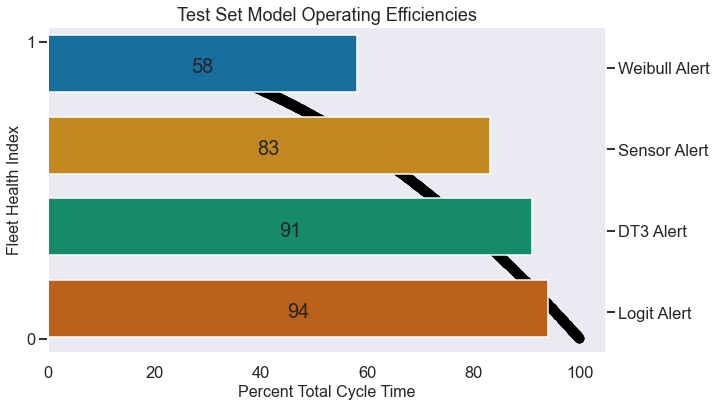

In [11]:
# Create a RUL trend line
a = np.arange(0,100,0.1)
b = -1*(a/100)**2 +1

# Plot results!
sns.set_style('dark')
sns.set_context('talk', font_scale=1)

fig, ax = plt.subplots(figsize=(10,6))
ax2=ax.twinx()
fleet_results_summary_df.reset_index(inplace=True)
ax.plot(a, b, linestyle='', marker='o', label='Probability Distribution', c='black')
ax2 =sns.barplot(x='Operating Efficiency',y='index', data=fleet_results_summary_df, orient='h', palette='colorblind')
plt.title("Test Set Model Operating Efficiencies", size=18)
ax.set_xlabel("Percent Total Cycle Time", size=16)
ax.set_ylabel("Fleet Health Index", size=16)
ax.set_yticks(ticks=[0,1])
ax.set_yticklabels(labels=[0,1])
ax2.bar_label(ax2.containers[0], size =20, label_type ='center')
ax2.set_ylabel("")
heightbars = [0.7,0.7,0.7, 0.7]
for bar, newheight in zip(ax2.patches, heightbars):
    x = bar.get_x()
    height = bar.get_height()
    centre = x + height/2.
    bar.set_x(centre - newheight/2.)
    bar.set_height(newheight)
    
plt.show()

Note that the Weibull operating efficiency has dropped from 64% from the modeling on the full data set in Part 2 to 58% in the test set, while the Sensor Alert efficiency has not changed.

#### Final Scoring - Engine Perspective

The test data set can also be used to investigate how each alert system behaves for a specific engine.  In addition, there is an opportunity to leverage the soft threshold values for the two ML models to further understand how much room for optimization may be left.  As depicted in the diagram below, raising the threshold for the binary classifiers above the default 0.5 increases the precision of the model's predictions of the Failure Class which in this application means a lower likelihood of throwing an alert too soon before the RUL reaches zero.

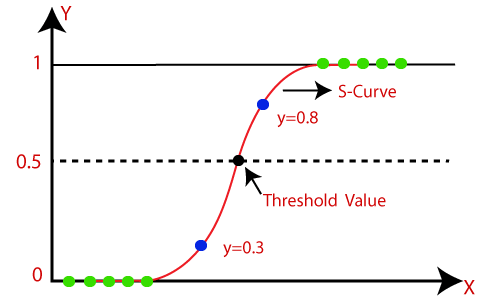

To demonstrate, the visualizations have been converted into a web application that can be accessed by running the companion Python script called 'Craig_Adams_Capstone_Engine_Efficiency_app.py' on the same data set above (see the README file for details).

The application allows the user to select different engines and to then adjust the hard threshold value for the two ML model alerts, aka the Alert Threshold. Some interesting findings from using the app to visualize the scenarios for each engine are:   
- In most cases, the ML models can handle Alert Thresholds of 0.9 without failing, which pushes the operating efficiencies into the mid to high '90s as shown for engine 100 below. Note that at a slightly higher Alert Threshold of 0.95 the DT3 model fails while the Logit model is stable.

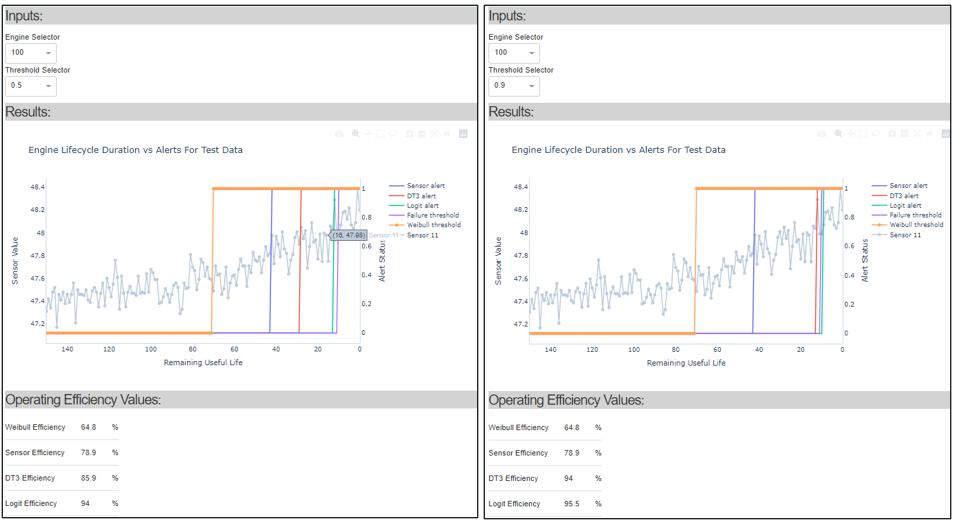




- There are some suprising differences between engines in terms of which alert is better, especially ones at the extremes ends of total engine lifecycle, which the Weibull alert happily illustrates in the picture below: Engine 91 on the left has a low total useful life of 137 cycles (131+6) with the Weibull efficiency leading at 96.3%, whereas Engine 96 on the right has the 340 cycles of life and a Weibull efficiency lagging at 38.5%.

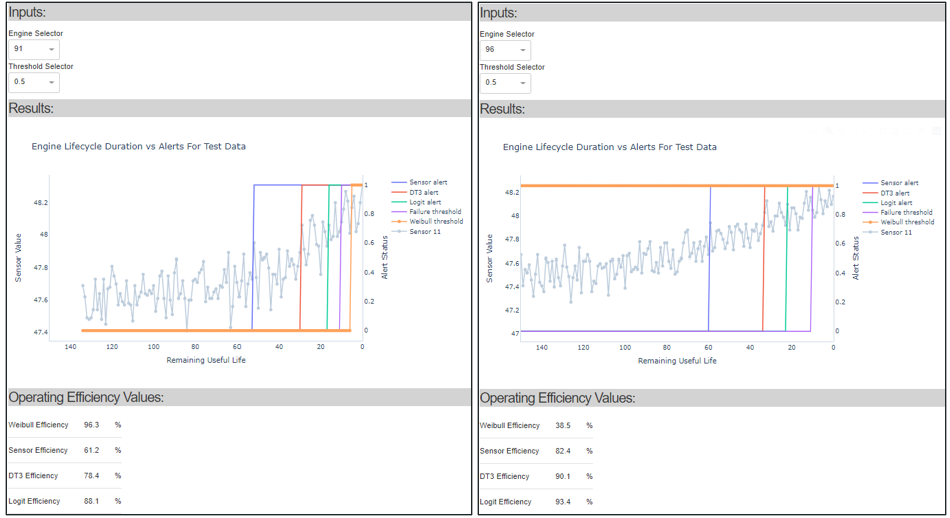

- The main source of early alerts seems to be the noise in sensor values within the data (represented by `sensor_11` in the app).  This leads to the hypothesis that pre-processing the sensor data to smooth the curves and reduce the noise may be a useful next step in further ML modeling, e.g. use a rolling 3 or 5 cycle moving average rather than the raw sensor measurements.  This would likely help prevent early alerts due to sudden jumps in sensor values and improve the model performances.


### Case Study Summary

Through significant effort in Parts 2, 3 and 4, a series of models have been explored and developed to maximize the useful life of our fictious client's engines while preventing unplanned failures. Each was evaluated from a technical perspective as well as from the business perspective during the model development exercises. In a real situation, these results would be presented back to the client for discussion and for making decisions about the next steps.

In that regard, a summary table has been prepared from the data (Table 1).

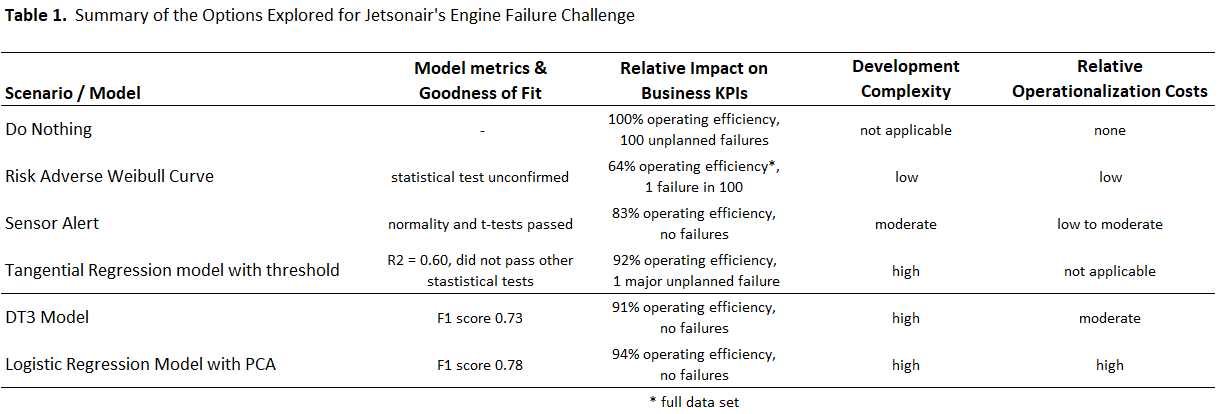

The table covers all models attempted including the Linear Regression model for completeness and it reports on the fleet level business metrics for a blend of the full data set and test data set.  The Development Complexity and Operationalization Costs are also expressed in qualitative terms, with the former being based on experience as well as the effort needed for modeling, and the latter based on the possible deployment scenarios, which were illustrated above in the narrative for each model's development.  

Salient points to be made would be the relative ease of building the Weibull curve but its significant impact on the operating efficiency where other solutions offer similar failure risks but better performance at the fleet level.  The prospects for the Sensor Alert as a practical deployable solution would also be discussed, and the upside of gaining ~10% more operating efficiency through development, deployment and investment in a full Data Science solution.

It would be important to explain the difference between probablistic risk of failure from statistical distributions and the  measured failures in the rather small data set.

The companion web-based app could be used to help showcase to the client just how the performance of each model can vary with the engine and with adjustments to the Alert Thresholds, and how much opportunity remains to optimize the ML model performances.

A significant factor to consider by the client in decided which avenue to pursue would be the relative cost savings of failure avoidance vs. the loss of operating cycles and the costs of building and sustaining the new solution.  The particular parameters of those calculations would be unique to each business scenario including our fictious client Jetsonair. Presumably though there would be interest in pursuing at least the Sensor Alert and hopefully the unconstrained Data Science solution represented by the Logistic Regression model as well.

One final point to make would be the potential to layer more than one solution to provide a more robust alerting system.  For example, deployment of the Sensor Alert and the LogReg model together would provide two layers of protection and complementary alerting systems likely used by different decision makers in the business (e.g. a mechanic and the staff data scientist or his engineering supervisor).  Working the two solutions together would also enhance any further optimization processes for both models.

Hopefully, through the process, the CEO would agree with the owner and hire a data scientist to get started in building these solutions.

### Project Summary and Conclusions 

[go to top](#Table-of-Contents) <br>

Given the results above, the case study has achieved its objectives. The performance of a progression of models, from simple to complex, were compared from a technical perspective as well as from their relative impact on the business KPIs and their potential for operationalization. 

During the study, five key learnings have been gleaned for consideration when performing similar studies in the future:

1. Simple models like the Sensor Alert can indeed be a way to gain a significant amount of business value for relatively low effort and cost.  The complex ML and DL tools truly may not be required.

2. Progressively more lines of code and data science skills are indeed required to build the predictive models versus simple statistical methods.

3. There is uncertainty with all of the models, simple and complex, and rigor must be applied in each case to fully explore and test the model sensitivities to business parameters and KPIs as well as technical parameters like precision and recall.

4. Having or acquiring domain knowledge and an understanding of the business KPIs can certainly help shape and accelerate the development path for a given model.  In some cases the business KPIs will drive the direction of development in the opposite direction from what the technical metrics might normally suggest.

5. An unconstrained approach at the beginning is likely wise rather than forcing a type of solution, given the example of the surprising features that were selected through the facile PCA transformation process in contrast to the onerous and unsuccessful Linear Regression exercise.

These lessons will be taken forward by the author into the next set of projects.

### Acknowledgements

The author would like to take a moment to thanks his wife and family for allowing him to pursue this and other projects over the last three months as part of the BrainStation Data Science bootcamp.  The author would also like to thank the staff at BrainStation, Arad, Fallyn, Shifath, Boris, Chelsea and Brian for their excellent guidance, support and teachings during the bootcamp.  A special shout out goes to Mr. Harrison:  I am Myles ahead of where I was prior to taking the program :)